# Managing input files 
In this notebook we will see how to load and correctly prepare the data for the computation of the Sea level equation resolution.

In [1]:
Output_way='C:/Users/ahenry01/Desktop/Python_code/Interpolated_grid/'

## First load the ice6G data
We choose to use the ICE6G model in our code as example. This model is not the only one existing there is ICE5G and ICE7G. The input data are of the shape, 

In [2]:
from scipy import io
import numpy as np
from SL_C0de.grid import TIME_GRID
import matplotlib.pyplot as plt

data=io.loadmat('C:/Users/ahenry01/Desktop/Python_code/SL_C0de_data/ice6G122k') #load the file, can be modified to load an other file.
ice_in=data['ice6g']# ice_in[temps, latitude, longitude] hauteur de la glace
ice_time=data['ice_time']
ice_time=ice_time.squeeze()
ice_time=np.append(ice_time[0]+1,ice_time)
ice_lon =data['ice_long'].squeeze()
ice_lat =data['ice_lat'].squeeze()[::-1]
# The ice is not in the good shape. We have to derivate it : 
ice_0=ice_in.T[0,:,:].copy()
ice_in=np.diff(ice_in.T,axis=0)
ice_in=np.concatenate((np.expand_dims(ice_0,axis=0),ice_in),axis=0)

In [3]:
stop=120 # define the number of time steps
step=1
time_step=np.arange(start=stop,stop=-step,step=-step) # in kyr to present
maxdeg=128 # define the maximum degree for spherical harmonics.

ice_time_grid=TIME_GRID(time_step,maxdeg,grid_name='ice_ICE6G_122_128')

ice_time_grid.interp_on_time_and_space(ice_in,ice_time,ice_lon,ice_lat,grid_type='global',backend=False)

121 (121,) (120, 128, 256)


C:\Users\ahenry01\AppData\Local\Temp\ipykernel_1016\299846876.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('bwr', 20)
c:\Users\ahenry01\miniconda3\envs\SL_C0de\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


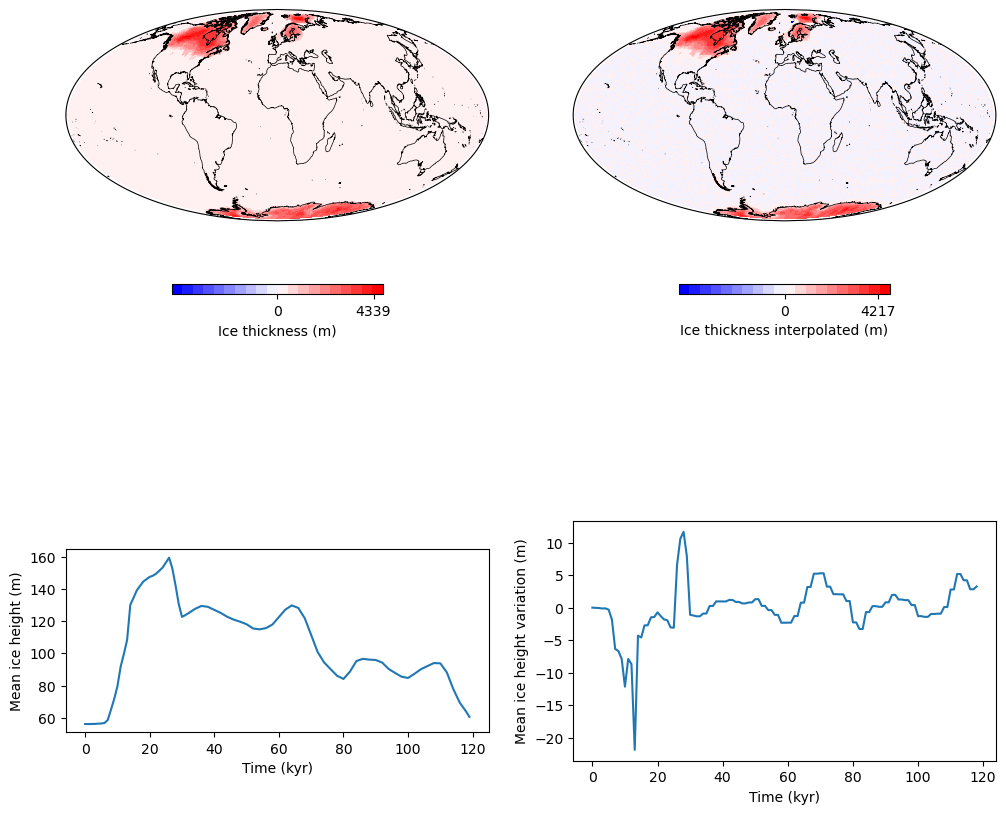

In [4]:
import cartopy
import cartopy.crs as ccrs
from matplotlib import cm
import matplotlib.colors as colors

selected_time=26

in_ind=np.where((ice_time-selected_time)==0)[0][0]
our_ind=np.where((ice_time_grid.time_step-selected_time)==0)[0][0]
cmap=cm.get_cmap('bwr', 20)
alpha_ocean=0
coast_line_width=0.5
norm = colors.TwoSlopeNorm(vmin=-10**(-10),vmax=None,vcenter=0)

fig = plt.figure(figsize=(12, 12), facecolor="none")

ax1  = plt.subplot(221, projection=ccrs.Mollweide())
ax1.set_global()
colormap = cmap
m1 = ax1.imshow(ice_in[:in_ind+1].sum(0), origin='lower', transform=ccrs.PlateCarree(),extent=[0,360, -89, 89], zorder=0, cmap=colormap, interpolation="gaussian",norm=norm)
cbar1=plt.colorbar(mappable=m1, orientation="horizontal", shrink=0.5)
cbar1.set_label('Ice thickness (m)')
cbar1.set_ticks([0, ice_time_grid.height_time_grid[:in_ind+1,:,:].sum(0).max()])
ax1.add_feature(cartopy.feature.OCEAN, alpha=alpha_ocean, zorder=99, facecolor="#BBBBBB")
ax1.coastlines(resolution="50m", zorder=100, linewidth=coast_line_width)

ax2  = plt.subplot(222, projection=ccrs.Mollweide())
ax2.set_global()
colormap = cmap
m2 = ax2.imshow(ice_time_grid.height_time_grid[:our_ind+1,:,:].sum(0), origin='lower', transform=ccrs.PlateCarree(),extent=[0,360, -89, 89], zorder=0, cmap=colormap, interpolation="gaussian",norm=norm)
cbar2=plt.colorbar(mappable=m2, orientation="horizontal", shrink=0.5)
cbar2.set_label('Ice thickness interpolated (m)')
cbar2.set_ticks([0, ice_in[:our_ind+1,:,:].sum(0).max()])
ax2.add_feature(cartopy.feature.OCEAN, alpha=alpha_ocean, zorder=99, facecolor="#BBBBBB")
ax2.coastlines(resolution="50m", zorder=100, linewidth=coast_line_width)

ice_time_grid.timegrdtotimecoeff()

ax3 = plt.subplot(223)
ax3.plot(ice_time_grid.time_step[1:],ice_time_grid.height_time_coeff[:,0].cumsum())
ax3.set_ylabel('Mean ice height (m)')
ax3.set_xlabel('Time (kyr)')
ax3.set_aspect(0.5)

ax4 = plt.subplot(224)
ax4.plot(ice_time_grid.time_step[2:],ice_time_grid.height_time_coeff[1:,0])
ax4.set_ylabel('Mean ice height variation (m)')
ax4.set_xlabel('Time (kyr)')
ax4.set_aspect(2)
plt.show()


In [5]:
fig.savefig(Output_way+'ICE/MAP/interpolation_'+ice_time_grid.time_grid_name+'.pdf')
ice_time_grid.save(save_way=Output_way+'ICE')

# Loading sediments

In [6]:
from scipy import io
import numpy as np
from SL_C0de.grid import TIME_GRID
import matplotlib.pyplot as plt
data=io.loadmat('C:/Users/ahenry01/Desktop/Python_code/SL_C0de_data/Irrawady_sedimentationgrid_2.mat') #load the file, can be modified to load an other file.
sed_grid=data['Sed_map_fin'][:,:-25]
sed_lon=data['lon'][:-25].squeeze()
sed_lat=data['lat'][:-25].squeeze()
sed_time=data['time'].squeeze()[::-1]
#sed_time=np.append(sed_time[0]+1,sed_time)
sed_grid=np.diff(sed_grid[::-1],axis=0)[::-1]

In [7]:
stop=120 # define the number of time steps
step=1
time_step=np.arange(start=stop,stop=-step,step=-step)
maxdeg=128 # define the maximum degree for spherical harmonics.

sed_time_grid=TIME_GRID(time_step,maxdeg,grid_name='sed_AYS1_122_128')
sed_time_grid.interp_on_time_and_space(sed_grid,sed_time,sed_lon,sed_lat,backend=False,grid_type='local')
sed_time_grid.height_time_grid=sed_time_grid.height_time_grid=sed_time_grid.height_time_grid[:,::-1,:]# latitude are inverted ! 

C:\Users\ahenry01\AppData\Local\Temp\ipykernel_1016\2445906243.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('bwr', 20)
c:\Users\ahenry01\miniconda3\envs\SL_C0de\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


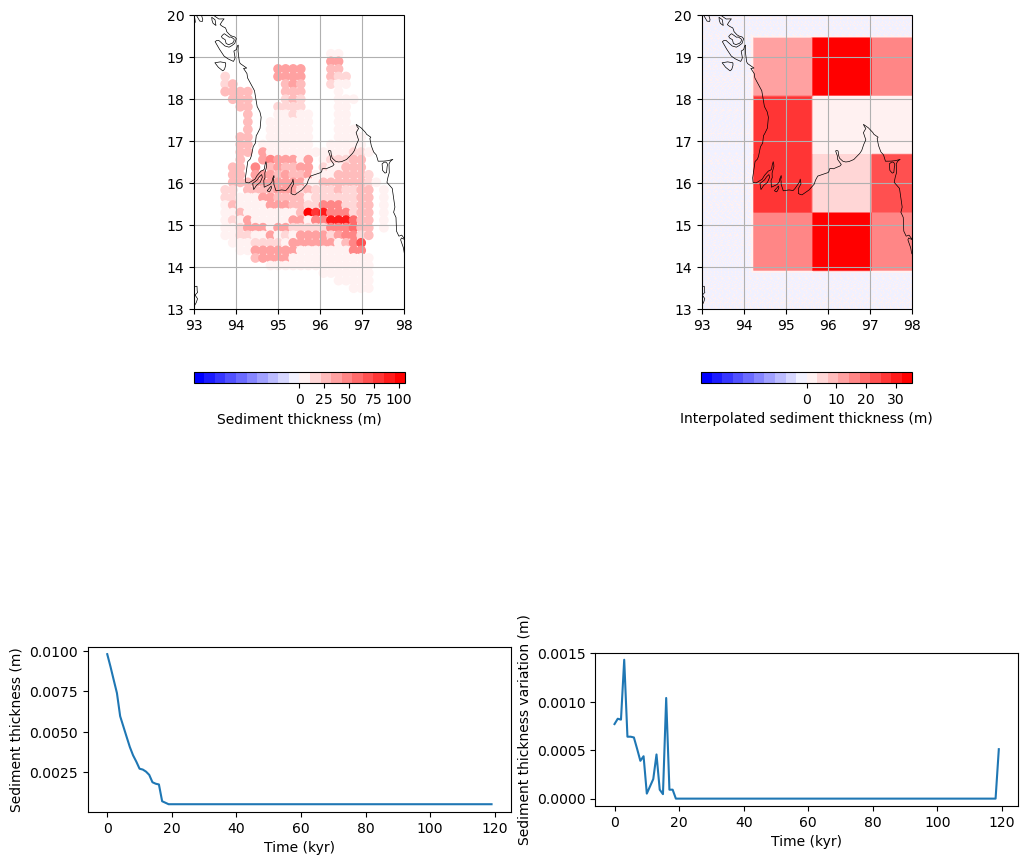

In [10]:
import cartopy
import cartopy.crs as ccrs
from matplotlib import cm
import matplotlib.colors as colors

selected_time=1

in_ind=np.where((sed_time-selected_time)==0)[0][0]
our_ind=np.where((sed_time_grid.time_step-selected_time)==0)[0][0]

area=(93,98,13,20)

cmap=cm.get_cmap('bwr', 20)
alpha_ocean=0
coast_line_width=0.5
norm1 = colors.TwoSlopeNorm(vmin=-0.1,vmax=None,vcenter=0)

fig = plt.figure(figsize=(12, 12), facecolor="none")
ax  = plt.subplot(222, projection=ccrs.PlateCarree())
ax.set_extent(area)
colormap = cmap
m = ax.imshow(sed_time_grid.height_time_grid[:our_ind+1,:,:].sum(0), origin='lower', transform=ccrs.PlateCarree(),extent=[0,360, -89, 89], zorder=0, cmap=colormap, interpolation="gaussian",norm=norm1)
cbar=plt.colorbar(mappable=m, orientation="horizontal", shrink=0.5)
cbar.set_label('Interpolated sediment thickness (m)')
#cbar.set_ticks([sed_time_grid.height_time_grid[our_ind,:,:].min(), 0, sed_time_grid.height_time_grid[ind,:,:].max()])
ax.add_feature(cartopy.feature.OCEAN, alpha=alpha_ocean, zorder=99, facecolor="#BBBBBB")
ax.coastlines(resolution="50m", zorder=100, linewidth=coast_line_width)
ax.gridlines()
ax.set_xticks(np.arange(area[0],area[1]+1,1))
ax.set_yticks(np.arange(area[2],area[3]+1,1))

norm2 = colors.TwoSlopeNorm(vmin=-0.1,vmax=None,vcenter=0)
ax  = plt.subplot(221, projection=ccrs.PlateCarree())
ax.set_extent(area)
colormap = cmap
m=ax.scatter(sed_lon,sed_lat,c=sed_grid[:in_ind+1,:].sum(0),transform=ccrs.PlateCarree(),zorder=0,norm=norm2,cmap=colormap)
cbar=plt.colorbar(mappable=m, orientation="horizontal", shrink=0.5)
cbar.set_label('Sediment thickness (m)')
#m = ax.imshow(sed_time_grid.height_time_grid[ind,:,:], origin='lower', transform=ccrs.PlateCarree(),extent=[0,360, -89, 89], zorder=0, cmap=colormap, interpolation="gaussian",norm=norm)
ax.add_feature(cartopy.feature.OCEAN, alpha=alpha_ocean, zorder=99, facecolor="#BBBBBB")
ax.coastlines(resolution="50m", zorder=100, linewidth=coast_line_width)
ax.gridlines()
ax.set_xticks(np.arange(area[0],area[1]+1,1))
ax.set_yticks(np.arange(area[2],area[3]+1,1))

sed_time_grid.timegrdtotimecoeff()

ax  = plt.subplot(223)
ax.plot(sed_time_grid.time_step[1:],sed_time_grid.height_time_coeff[:,0].cumsum())
ax.set_aspect(5000)
ax.set_ylabel('Sediment thickness (m)')
ax.set_xlabel('Time (kyr)')

ax  = plt.subplot(224)
ax.plot(sed_time_grid.time_step[1:],sed_time_grid.height_time_coeff[:,0])
ax.set_aspect(30000)
ax.set_ylabel('Sediment thickness variation (m)')
ax.set_xlabel('Time (kyr)')
plt.show()

In [11]:
fig.savefig(Output_way+'SED/MAP/interpolation_'+sed_time_grid.time_grid_name+'.pdf')
sed_time_grid.save(save_way=Output_way+'SED')

# Loading Topography

In [17]:
from scipy import io
import numpy as np
from SL_C0de.grid import TIME_GRID
import matplotlib.pyplot as plt

data=io.loadmat('C:/Users/ahenry01/Desktop/Python_code/SL_C0de_data/topo_SL') #load the file, can be modified to load an other file.
topo_grid=data['topo_bed'][::2,1::2].squeeze()
topo_lat=data['lat_topo'].squeeze()[::-2]
topo_lon=data['lon_topo'].squeeze()[1::2]

In [18]:
stop=120 # define the number of time steps
step=1
time_step=np.arange(start=stop,stop=0,step=-step)
maxdeg=128 # define the maximum degree for spherical harmonics.

topo_time_grid=TIME_GRID(time_step,maxdeg,grid_name='topo_topo_SL_122_128')
topo_time_grid.topo_pres=topo_time_grid.interp_on(topo_grid,topo_lon,topo_lat,grid_type='global')

for i in range(topo_time_grid.time_step_number-1):
    if i==0:
        topo_time_grid.height_time_grid[i,:,:]=topo_time_grid.topo_pres-sed_time_grid.height_time_grid[0,:,:]-ice_time_grid.height_time_grid[0,:,:]
    else :
        topo_time_grid.height_time_grid[i,:,:]=topo_time_grid.topo_pres-sed_time_grid.height_time_grid[:i+1,:,:].sum(0)-ice_time_grid.height_time_grid[:i+1,:,:].sum(0)

C:\Users\ahenry01\AppData\Local\Temp\ipykernel_1016\3973780740.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('bwr', 20)


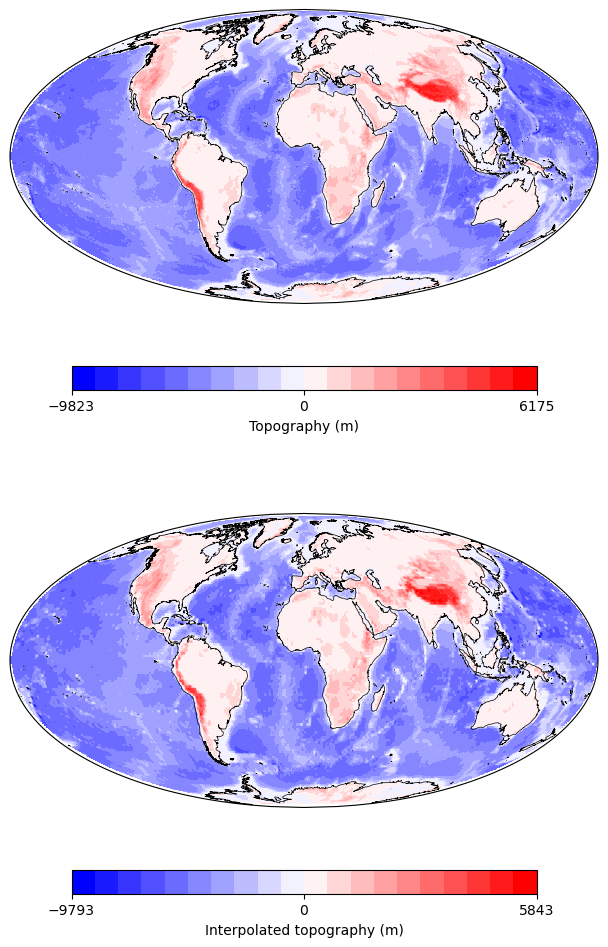

In [19]:
import cartopy
import cartopy.crs as ccrs
from matplotlib import cm
import matplotlib.colors as colors

cmap=cm.get_cmap('bwr', 20)
alpha_ocean=0
coast_line_width=0.5
norm1 = colors.TwoSlopeNorm(vmin=None,vmax=None,vcenter=0)

fig = plt.figure(figsize=(12, 12), facecolor="none")
ax  = plt.subplot(212, projection=ccrs.Mollweide())
ax.set_global()
colormap = cmap
m = ax.imshow(topo_time_grid.topo_pres, origin='lower', transform=ccrs.PlateCarree(),extent=[0,360, -89, 89], zorder=0, cmap=colormap, interpolation="gaussian",norm=norm1)
cbar=plt.colorbar(mappable=m, orientation="horizontal", shrink=0.5)
cbar.set_label('Interpolated topography (m)')
cbar.set_ticks([topo_time_grid.topo_pres.min(), 0, topo_time_grid.topo_pres.max()])
ax.add_feature(cartopy.feature.OCEAN, alpha=alpha_ocean, zorder=99, facecolor="#BBBBBB")
ax.coastlines(resolution="50m", zorder=100, linewidth=coast_line_width)

norm2 = colors.TwoSlopeNorm(vmin=None,vmax=None,vcenter=0)

ax  = plt.subplot(211, projection=ccrs.Mollweide())
ax.set_global()
colormap = cmap
m = ax.imshow(topo_grid, origin='lower', transform=ccrs.PlateCarree(),extent=[0,360, -89, 89], zorder=0, cmap=colormap, interpolation="gaussian",norm=norm2)
cbar=plt.colorbar(mappable=m, orientation="horizontal", shrink=0.5)
cbar.set_label('Topography (m)')
cbar.set_ticks([topo_grid.min(), 0, topo_grid.max()])
ax.add_feature(cartopy.feature.OCEAN, alpha=alpha_ocean, zorder=99, facecolor="#BBBBBB")
ax.coastlines(resolution="50m", zorder=100, linewidth=coast_line_width)

In [21]:
fig.savefig(Output_way+'TOPO/MAP/interpolation_'+topo_time_grid.time_grid_name+'.pdf')
sed_time_grid.save(save_way=Output_way+'TOPO')